In [16]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, roc_auc_score

In [17]:
PATH = '../data/'
MODEL_PATH = '../model/'

In [18]:
validation_data = pd.read_parquet(PATH + 'output/val_data.parquet')
validation_data.head()

,schedule_playoff,score_home,score_away,stadium_neutral,home_win_historic_confront,away_win_historic_confront,matches,avg_score_home_last_season,avg_score_away_last_season,total_score_home_last_season,...,special_teams_punting_int_away_,special_teams_punting_rate_away_,special_teams_punting_1st_away_,special_teams_punting_1st_perc_away_,special_teams_punting_20+_away_,special_teams_punting_40+_away_,special_teams_punting_lng_away_,special_teams_punting_sck_away_,special_teams_punting_scky_away_,is_home_winner
0,False,27,20,False,0.571429,0.428571,14.0,23.272727,24.500000,256,...,7,102.5,180,0.364,52,9,-80,41,246,1
1,False,34,29,True,0.566667,0.433333,30.0,30.875000,27.000000,247,...,11,96.4,211,0.363,56,7,77,30,242,1
2,False,10,18,False,0.166667,0.833333,18.0,24.000000,17.333333,192,...,9,84.6,153,0.302,41,9,86,36,258,0
3,False,34,28,False,0.615385,0.384615,13.0,28.272727,15.777778,311,...,12,82.9,173,0.312,38,3,-69,42,286,1
4,False,24,17,False,0.333333,0.666667,6.0,24.875000,12.625000,199,...,11,83.2,158,0.320,54,10,70,64,445,1


In [19]:
target = 'is_home_winner'
X_val = validation_data.drop(target, axis=1)
y_val = validation_data[target]

In [20]:
with open(MODEL_PATH + 'xgb_model.pkg', 'rb') as f:
    xgb_model = pickle.load(f)

In [21]:
y_val

0      1
1      1
2      0
3      1
4      1
      ..
280    1
281    1
282    1
283    1
284    1
Name: is_home_winner, Length: 285, dtype: int64

F1 score: 0.9872611464968153
AUC ROC score: 0.9851669648181276
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       129
           1       0.98      0.99      0.99       156

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285

Confusion matrix:


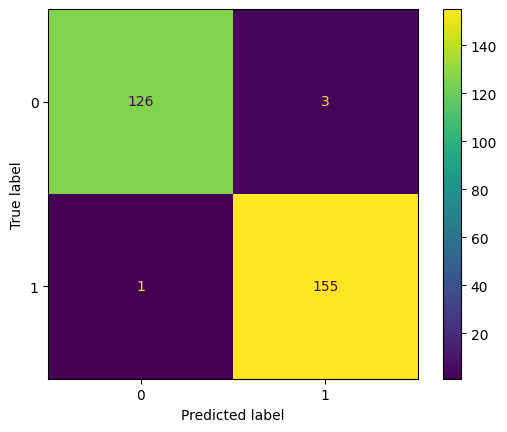

In [22]:
y_pred = xgb_model.predict(X_val)

score = f1_score(y_val, y_pred)
print(f'F1 score: {score}')
print(f'AUC ROC score: {roc_auc_score(y_val, y_pred)}')
print('Classification report:')
print(classification_report(y_val, y_pred))

print('Confusion matrix:')
cf_matrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                              display_labels=xgb_model.classes_)
disp.plot(values_format='')
plt.show()